In [1]:
import numpy as np
from matplotlib import pyplot as plt
import bgp_qnm_fits as bgp
import corner

# Constants
ID = '0001'
DATA_TYPE = 'news'
SPHERICAL_MODES = [(2, 2)]
THRESHOLD = 0.9
N_MAX = 6
t0 = 10
T = 100
N_DRAWS = 10000
INCLUDE_CHIF = True
INCLUDE_MF = True
t0_vals = np.arange(0, 40.1, 2)

sim = bgp.SXS_CCE(ID, type=DATA_TYPE, lev="Lev5", radius="R2")
tuned_param_dict_GP = bgp.get_tuned_param_dict("GP", data_type=DATA_TYPE)[ID]
Mf, chif = sim.Mf, sim.chif_mag

/data/vault/rvnd2/Code/qnmfits/qnmfits/Waveforms/Base.py:116: RuntimeWarning: divide by zero encountered in divide
  chidot = self.Jdot/(self.Moft**2).reshape(len(self.Moft),1)


In [ ]:
candidate_modes_1 = [(2, 2, n, 1) for n in range(7)]

full_fit_1 = bgp.BGP_fit(
    sim.times,
    sim.h,
    candidate_modes_1 + [(3, 2, 0, 1)],
    Mf,
    chif,
    tuned_param_dict_GP,
    bgp.kernel_GP,
    t0=t0,
    use_nonlinear_params=False,
    num_samples=N_DRAWS,
    t0_method="geq",
    T=T,
    spherical_modes=SPHERICAL_MODES,
    include_chif=INCLUDE_CHIF,
    include_Mf=INCLUDE_MF,
    strain_parameters=False,
    data_type=DATA_TYPE
)
model_1 = full_fit_1.fit["model_array_linear"]
times_1 = full_fit_1.fit["analysis_times"]
data_1 = full_fit_1.fit["data_array_masked"]

residual_1 = data_1 - model_1
r_squared_1 = np.einsum("st, st -> ", np.conj(residual_1), residual_1).real


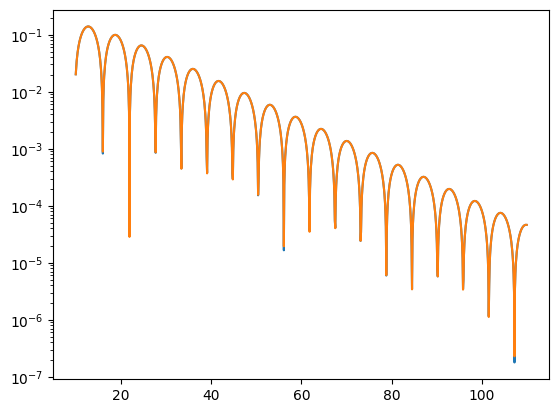

In [5]:
plt.plot(times_1, np.abs(np.real(data_1[0])), label="Data 1")
plt.plot(times_1, np.abs(np.real(model_1[0])), label="Model 1")
plt.yscale('log')

In [4]:
candidate_modes_2 = [(2, 2, n, 1) for n in range(2)]

full_fit_2 = bgp.BGP_fit(
    sim.times,
    sim.h,
    candidate_modes_2 + [(3, 2, 0, 1)],
    Mf,
    chif,
    tuned_param_dict_GP,
    bgp.kernel_GP,
    t0=t0,
    use_nonlinear_params=False,
    num_samples=N_DRAWS,
    t0_method="geq",
    T=T,
    spherical_modes=SPHERICAL_MODES,
    include_chif=INCLUDE_CHIF,
    include_Mf=INCLUDE_MF,
    strain_parameters=False,
    data_type=DATA_TYPE
)
model_2 = full_fit_2.fit["model_array_linear"]
times_2 = full_fit_2.fit["analysis_times"]
data_2 = full_fit_2.fit["data_array_masked"]

residual_2 = data_2 - model_2
r_squared_2 = np.einsum("st, st -> ", np.conj(residual_2), residual_2).real

In [6]:
import json 

with open(f'mode_content_data_0.9999_big.json', 'r') as f:
    mode_content_data_dict = json.load(f)
    

In [7]:
t0_vals = np.array(mode_content_data_dict['times'])
spherical_modes = [tuple(mode) for mode in mode_content_data_dict['spherical_modes']]
initial_modes = [tuple(mode) for mode in mode_content_data_dict['initial_modes']]
candidate_modes = [tuple(mode) for mode in mode_content_data_dict['candidate_modes']]

In [10]:
full_modes_list = [list(map(tuple, inner_list)) for inner_list in mode_content_data_dict["0001"]]

In [12]:
test_mode = (3,3,0,1,3,3,0,1)

fits = [] 

for i, t0 in enumerate(t0_vals):

    select_modes = full_modes_list[i]
    fits.append(bgp.BGP_fit(sim.times, 
                                sim.h, 
                                select_modes, 
                                sim.Mf, 
                                sim.chif_mag, 
                                tuned_param_dict_GP, 
                                bgp.kernel_GP, 
                                t0=t0, 
                                T=T, 
                                decay_corrected=True,
                                spherical_modes = spherical_modes,
                                include_chif=False,
                                include_Mf=False,
                                data_type=DATA_TYPE)
                )

AttributeError: type object 'qnm' has no attribute 'Qmu_D'

In [1]:
import qnmfits 

i = 5
j = 5
d = 3
h = 2
b = 3
f = 2
s1 = -2
s2 = -2

qnmfits.spatial_mapping_functions.kappa(i, j, d, h, b, f, s1, s2)

0.38976996741258707

In [9]:
qnmfits.qnm.mu(4, 4, 4, 4, 0, 1, 0.7, -2)

(0.9953321510087162+0j)

In [5]:
l4 = 6
m4 = 6
l = 2
m = 2
n = 0
p = 1
lp = 2
mp = 2
nprime = 0
pp = 1
lpp = 2
mpp = 2
npp = 0
ppp = 1


indices = (l4, m4, l, m, n, p, lp, mp, nprime, pp, lpp, mpp, npp, ppp)

qnmfits.spatial_mapping_functions.Cmu_D([indices], 0.7, 6)

[(151.40429141891235-3.4723255992986166j)]

In [10]:
l4 = 7
m4 = 6
l = 2
m = 2
n = 0
p = 1
lp = 2
mp = 2
nprime = 0
pp = 1
lpp = 2
mpp = 2
npp = 0
ppp = 1


indices = (l4, m4, l, m, n, p, lp, mp, nprime, pp, lpp, mpp, npp, ppp)

qnmfits.spatial_mapping_functions.Cmu_D([indices], 0.7, 6)

[(39.27704821122107-6.69183861544011j)]

In [11]:
l4 = 7
m4 = 7
l = 2
m = 2
n = 0
p = 1
lp = 2
mp = 2
nprime = 0
pp = 1
lpp = 2
mpp = 2
npp = 0
ppp = 1


indices = (l4, m4, l, m, n, p, lp, mp, nprime, pp, lpp, mpp, npp, ppp)

qnmfits.spatial_mapping_functions.Cmu_D([indices], 0.7, 6)

[(-1.2382917330848276e-14-1.8423170825584093e-14j)]

In [2]:
import json 

with open(f'mode_content_files/mode_content_data_0001.json', 'r') as f:
    mode_content_data_dict = json.load(f)

In [6]:
mode_content_data_dict["run_time"] / (60*60)

7.551827344695727

In [1]:
N_MAX = 6

SPHERICAL_MODES_PE = [(2, 2),
                      (3, 2), 
                      (4, 4), (4, 2),
                      (5, 4), (5, 2),
                      (6, 6), (6, 4),
                      (7, 6)]
                      
SPHERICAL_MODES_EVERYTHING_PE = [(2, 2),
                                (3, 2), 
                                (4, 4), (4, 2),
                                (5, 4), (5, 2),
                                (6, 6), (6, 4), (6, 2),
                                (7, 6), (7, 4), (7, 2)]

In [4]:
candidate_modes = [(*s, n, 1) for s in SPHERICAL_MODES_EVERYTHING_PE for n in range(0, N_MAX + 1)] + \
                        [(*s, n, -1) for s in SPHERICAL_MODES_EVERYTHING_PE for n in range(0, N_MAX + 1)] + \
                        SPHERICAL_MODES_EVERYTHING_PE + \
                        [
                            (2, 2, 0, 1, 2, 2, 0, 1),
                            (3, 3, 0, 1, 3, 3, 0, 1),
                            (2, 2, 0, 1, 2, 2, 0, 1, 2, 2, 0, 1)
                        ]

In [5]:
print(len(candidate_modes))

183
